In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("covid19_italy_region.csv")
l,m=dataset.shape
#print(l)

In [3]:
#RegionCode with hotspot
k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i in range(1,21):
    z=0
    for j in range(0,l-1):
        if dataset.iloc[j,3]==i:
            tot=dataset.iloc[j,12]
            z+=tot
        k[i]=z
        ko=k[1:]
print("Number of new positive cases per Region Code:",ko)
sum_new_cases=sum(ko)
print("Total new cases in italy:",sum_new_cases)
for h in range(1,len(ko)):
    if ko[h]==max(ko):
        print("RegionCode which is hotspot:",h+1)


Number of new positive cases per Region Code: [13343, 835, 52319, 4287, 11587, 2153, 4757, 17825, 6173, 1263, 4710, 4148, 1799, 224, 3148, 2514, 291, 833, 2097, 935]
Total new cases in italy: 135241
RegionCode which is hotspot: 3


In [4]:
prob=ko/sum_new_cases
print(prob)

[0.09866091 0.00617416 0.38685754 0.03169897 0.08567668 0.01591973
 0.03517424 0.13180175 0.04564444 0.00933888 0.03482672 0.03067117
 0.01330218 0.0016563  0.02327696 0.01858904 0.00215171 0.00615937
 0.01550565 0.00691358]


In [5]:
log=np.log
new_cases_entropy=(-prob*log(prob))
print(new_cases_entropy)

[0.22850522 0.03141033 0.36739813 0.10940807 0.21052256 0.0659108
 0.11774371 0.26709049 0.14089862 0.04364591 0.11692619 0.10687162
 0.05746312 0.01060558 0.08752816 0.07408072 0.01321473 0.03134986
 0.06460509 0.03439001]


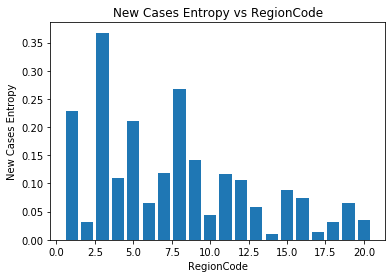

In [6]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.bar(a,new_cases_entropy)
plt.title("New Cases Entropy vs RegionCode")
plt.xlabel("RegionCode")
plt.ylabel("New Cases Entropy")
plt.show()

In [7]:
#entropy = np.nan_to_num(entropy)
#H_D=sum(entropy)
#print(H_D)
#Calculations for New Positive cases(main variable)
mean_new_cases=sum_new_cases/20
length=len(ko)
P=N=0
for o in range(0,length):
    if ko[o]<=mean_new_cases:
        zap=1
        N+=zap
    else:
        zipp=1
        P+=zipp
print(P)

4


In [8]:
from math import log
#log2=math.log(,2)
entropy_class=(-(P/(P+N))*log(P/(P+N),2))+(-(N/(P+N))*log(N/(P+N),2))
print("entropy of the class(total):",entropy_class)

entropy of the class(total): 0.7219280948873623


In [9]:
#Intensive care patients calculations
ka=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i in range(1,21):
    z=0
    for j in range(0,l-1):
        if dataset.iloc[j,3]==i:
            uno=dataset.iloc[j,8]
            z+=uno
    #print(z)
    ka[i]=z
    kaa=ka[1:]
print("Number of Intensive care patients per Region Code:",kaa)

Number of Intensive care patients per Region Code: [9490, 449, 34128, 2421, 7333, 1130, 3674, 8297, 6025, 943, 4091, 2985, 1460, 186, 2393, 1803, 306, 402, 1446, 435]


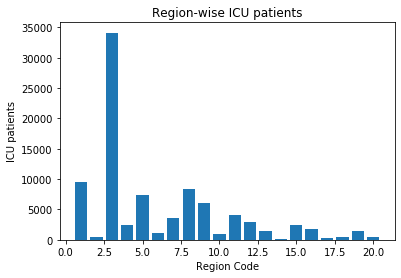

In [10]:
mean_ICU=((sum(kaa))/20)
plt.bar(a,kaa)
plt.xlabel("Region Code")
plt.ylabel("ICU patients")
plt.title("Region-wise ICU patients")
plt.show()
#print(mean_ICU)

In [11]:
P1=P2=N1=N2=0
for kk in range(0,len(kaa)):
    if kaa[kk]>mean_ICU:
        if ko[kk]>mean_new_cases:
            zz=1
            P1+=zz
        else:
            zz=1
            N1+=zz
    else:
        if ko[kk]>mean_new_cases:
            zz=1
            P2+=zz
        else:
            zz=1
            N2+=zz
#print(P1,N1,P2,N2)
H_D_1=(-(P1/(P1+N1))*log(P1/(P1+N1),2))+(-(N1/(P1+N1))*log(N1/(P1+N1),2))
H_D_2=0
entropy_ICU=(((P1+N1)/(P1+N1+P2+N2))*H_D_1)+(((P2+N2)/(P1+N1+P2+N2))*H_D_2)
#print(entropy_ICU)

In [12]:
Information_Gain_ICU=entropy_class-entropy_ICU
print("Information Gain of Intensive care patients:",Information_Gain_ICU)

Information Gain of Intensive care patients: 0.5414460711655218


In [13]:
G_P1=1-((P1/(P1+N1))*(P1/(P1+N1)))
G_N1=1-((N1/(P1+N1))*(N1/(P1+N1)))
GINI_PN1=((P1/(P1+N1))*G_P1)+((N1/(P1+N1))*G_N1)
#print("GINI index of first split:",GINI_PN1)
G_P2=1-((P2/(P2+N2))*(P2/(P2+N2)))
G_N2=1-((N2/(P2+N2))*(N2/(P2+N2)))
GINI_PN2=((P2/(P2+N2))*G_P2)+((N2/(P2+N2))*G_N2)
#print("GINI index of second split:",GINI_PN2)
print("GINI index of Intensive care split:",(GINI_PN1+GINI_PN2)/2)

GINI index of Intensive care split: 0.23999999999999996


In [14]:
kn=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i in range(1,21):
    z=0
    for j in range(0,l-1):
        if dataset.iloc[j,3]==i:
            unoo=dataset.iloc[j,13]
            z+=unoo
    #print(z)
    kn[i]=z
    knn=kn[1:]
print("Number of recovered patients per Region Code:",knn)

Number of recovered patients per Region Code: [7609, 727, 205350, 5756, 13628, 5582, 8881, 24562, 3152, 2484, 1416, 5121, 1269, 331, 1914, 985, 60, 323, 1301, 514]


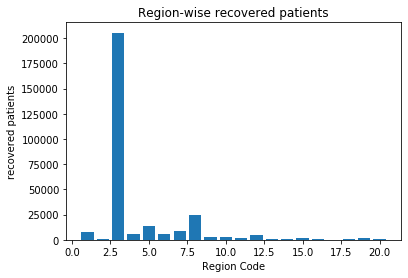

In [15]:
mean_recovered=((sum(knn))/20)
plt.bar(a,knn)
plt.xlabel("Region Code")
plt.ylabel("recovered patients")
plt.title("Region-wise recovered patients")
plt.show()

In [16]:
P3=P4=N3=N4=0
for kk in range(0,len(knn)):
    if knn[kk]>mean_recovered:
        if ko[kk]>mean_new_cases:
            zz=1
            P3+=zz
        else:
            zz=1
            N3+=zz
    else:
        if ko[kk]>mean_new_cases:
            zz=1
            P4+=zz
        else:
            zz=1
            N4+=zz
print(P3,N3,P4,N4)
H_D_4=(-(P4/(P4+N4))*log(P4/(P4+N4),2))+(-(N4/(P4+N4))*log(N4/(P4+N4),2))
H_D_3=0
entropy_recovered=(((P3+N3)/(P3+N3+P4+N4))*H_D_3)+(((P4+N4)/(P3+N3+P4+N4))*H_D_4)
print(entropy_recovered)

2 0 2 16
0.45293250129808116


In [17]:
Information_Gain_recovered=entropy_class-entropy_recovered
print("Information Gain of recovered patients:",Information_Gain_recovered)

Information Gain of recovered patients: 0.26899559358928116


In [18]:
G_P3=1-((P3/(P3+N3))*(P3/(P3+N3)))
G_N3=1-((N3/(P3+N3))*(N3/(P3+N3)))
GINI_PN3=((P3/(P3+N3))*G_P3)+((N3/(P3+N3))*G_N3)
#print("GINI index of first split:",GINI_PN3)
G_P4=1-((P4/(P4+N4))*(P4/(P4+N4)))
G_N4=1-((N4/(P4+N4))*(N4/(P4+N4)))
GINI_PN4=((P4/(P4+N4))*G_P4)+((N4/(P4+N4))*G_N4)
#print("GINI index of second split:",GINI_PN2)
print("GINI index of Recovered patients:",(GINI_PN3+GINI_PN4)/2)

GINI index of Recovered patients: 0.14814814814814814


In [19]:
km=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i in range(1,21):
    z=0
    for j in range(0,l-1):
        if dataset.iloc[j,3]==i:
            unoo=dataset.iloc[j,14]
            z+=unoo
    #print(z)
    km[i]=z
    kmm=km[1:]
print("Number of deaths per Region Code:",kmm)

Number of deaths per Region Code: [14420, 913, 131568, 4133, 7560, 2051, 7493, 30402, 4093, 557, 7946, 2814, 1813, 182, 2266, 2034, 107, 544, 1204, 517]


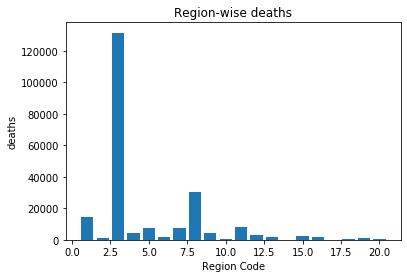

In [20]:
mean_deaths=((sum(kmm))/20)
plt.bar(a,kmm)
plt.xlabel("Region Code")
plt.ylabel("deaths")
plt.title("Region-wise deaths")
plt.show()

In [21]:
P5=P6=N5=N6=0
for kk in range(0,len(knn)):
    if kmm[kk]>mean_deaths:
        if ko[kk]>mean_new_cases:
            zz=1
            P5+=zz
        else:
            zz=1
            N5+=zz
    else:
        if ko[kk]>mean_new_cases:
            zz=1
            P6+=zz
        else:
            zz=1
            N6+=zz
#print(P5,N5,P6,N6)
H_D_6=(-(P6/(P6+N6))*log(P6/(P6+N6),2))+(-(N6/(P6+N6))*log(N6/(P6+N6),2))
H_D_5=0
entropy_deaths=(((P6+N6)/(P6+N6+P5+N5))*H_D_6)+(((P5+N5)/(P5+N5+P6+N6))*H_D_5)
print(entropy_deaths)

0.27434341506278853


In [22]:
Information_Gain_deaths=entropy_class-entropy_deaths
print("Information Gain of deaths:",Information_Gain_deaths)

Information Gain of deaths: 0.4475846798245738


In [23]:
G_P5=1-((P5/(P5+N5))*(P5/(P5+N5)))
G_N5=1-((N5/(P5+N5))*(N5/(P5+N5)))
GINI_PN5=((P5/(P5+N5))*G_P5)+((N5/(P5+N5))*G_N5)
#print("GINI index of first split:",GINI_PN1)
G_P6=1-((P6/(P6+N6))*(P6/(P6+N6)))
G_N6=1-((N6/(P6+N6))*(N6/(P6+N6)))
GINI_PN6=((P6/(P6+N6))*G_P6)+((N6/(P6+N6))*G_N6)
#print("GINI index of second split:",GINI_PN2)
print("GINI index of deaths split:",(GINI_PN5+GINI_PN5)/2)

GINI index of deaths split: 0.0


In [24]:
kl=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for i in range(1,21):
    z=0
    for j in range(0,l-1):
        if dataset.iloc[j,3]==i:
            unooo=dataset.iloc[j,-1]
            z+=unooo
    #print(z)
    kl[i]=z
    kll=kl[1:]
print("Tests performed per Region Code:",kll)

Tests performed per Region Code: [528899, 33344, 2553458, 346165, 2139191, 303311, 202893, 1089084, 637412, 153411, 233925, 668716, 166643, 21493, 274455, 268082, 35048, 166266, 285562, 95910]


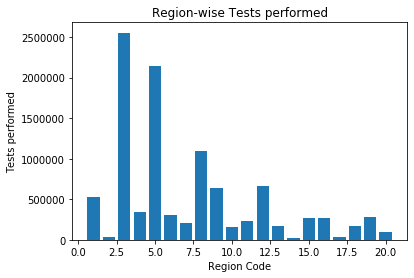

In [25]:
mean_TP=((sum(kll))/20)
plt.bar(a,kll)
plt.xlabel("Region Code")
plt.ylabel("Tests performed")
plt.title("Region-wise Tests performed")
plt.show()

In [26]:
P7=P8=N7=N8=0
for kk in range(0,len(kll)):
    if kll[kk]>mean_TP:
        if ko[kk]>mean_new_cases:
            zz=1
            P7+=zz
        else:
            zz=1
            N7+=zz
    else:
        if ko[kk]>mean_new_cases:
            zz=1
            P8+=zz
        else:
            zz=1
            N8+=zz
print(P7,N7,P8,N8)
H_D_7=(-(P7/(P7+N7))*log(P7/(P7+N7),2))+(-(N7/(P7+N7))*log(N7/(P7+N7),2))
H_D_8=0
entropy_TP=(((P7+N7)/(P7+N7+P8+N8))*H_D_7)+(((P8+N8)/(P8+N8+P7+N7))*H_D_8)
print(entropy_TP)

4 2 0 14
0.27548875021634683


In [27]:
Information_Gain_TP=entropy_class-entropy_TP
print("Information Gain of tests performed:",Information_Gain_TP)

Information Gain of tests performed: 0.4464393446710155


In [28]:
G_P7=1-((P7/(P7+N7))*(P7/(P7+N7)))
G_N7=1-((N7/(P7+N7))*(N7/(P7+N7)))
GINI_PN7=((P7/(P7+N7))*G_P7)+((N7/(P7+N7))*G_N7)
#print("GINI index of first split:",GINI_PN1)
G_P8=1-((P8/(P8+N8))*(P8/(P8+N8)))
G_N8=1-((N8/(P8+N8))*(N8/(P8+N8)))
GINI_PN8=((P8/(P8+N8))*G_P8)+((N8/(P8+N8))*G_N8)
#print("GINI index of second split:",GINI_PN2)
print("GINI index of deaths split:",(GINI_PN8+GINI_PN8)/2)

GINI index of deaths split: 0.0


In [29]:
Information_gain=[Information_Gain_ICU,Information_Gain_recovered,Information_Gain_deaths,Information_Gain_TP]
information_gain=max(Information_gain)
print(information_gain)

0.5414460711655218


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
x=dataset.drop('NewPositiveCases',axis=1)
X=x.iloc[:,8:9]
y=dataset['NewPositiveCases']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
#classifier.predict(x_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(60.469120065789475, 214.85142857142856, 'X[0] <= 0.5\ngini = 0.969\nsamples = 646\nvalue = [1, 1, 1, 99, 28, 18, 16, 11, 11, 9, 4, 6, 9\n8, 4, 3, 1, 9, 7, 1, 2, 6, 3, 2, 7, 1, 5\n1, 5, 3, 5, 5, 4, 4, 3, 5, 4, 3, 3, 2, 2\n1, 7, 1, 2, 6, 1, 3, 1, 4, 4, 4, 2, 2, 3\n1, 3, 1, 1, 1, 4, 4, 1, 3, 1, 2, 5, 1, 4\n3, 3, 1, 3, 3, 2, 1, 3, 3, 4, 4, 1, 4, 1\n2, 1, 2, 4, 4, 2, 1, 1, 1, 2, 1, 1, 2, 1\n1, 2, 1, 5, 3, 1, 1, 1, 2, 1, 2, 2, 1, 2\n1, 1, 2, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2\n1, 3, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 5, 1\n1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1\n1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(58.51122532894737, 209.6742857142857, 'gini = 0.646\nsamples = 150\nvalue = [0, 0, 0, 85, 20, 7, 13, 6, 4, 7, 1, 0, 2, 1\n0, 1, 0, 0, 0, 0, 0, 

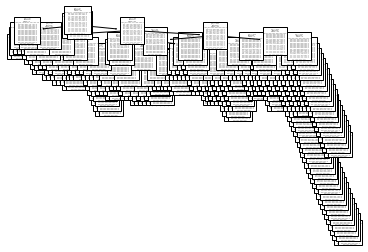

In [97]:
tree.plot_tree(classifier)

In [64]:
des = sorted(prob, reverse=True)
print(des)

[0.3868575358064492, 0.13180174651178267, 0.09866090904385505, 0.08567668088819219, 0.04564444214402437, 0.03517424449686116, 0.03482671675009797, 0.0316989670292293, 0.030671172203695626, 0.023276964825755503, 0.018589037348141466, 0.015919728484705083, 0.015505652871540435, 0.01330217907291428, 0.009338883918338373, 0.006913583898374014, 0.006174163160580001, 0.006159374745824122, 0.0021517143469805752, 0.0016563024526585872]


In [65]:
yyy=[]
print("###################################HuffMans Code########################################################")
for mi in reversed(range(1,len(des))):
    des.append(des[mi-1]+des[mi])
    des=sorted(des,reverse=True)
    print("Step:",[mi])
    des.pop(mi+1)
    des.pop(mi)
    print(des)
    yyy.append(des)

###################################HuffMans Code########################################################
Step: [19]
[0.3868575358064492, 0.13180174651178267, 0.09866090904385505, 0.08567668088819219, 0.04564444214402437, 0.03517424449686116, 0.03482671675009797, 0.0316989670292293, 0.030671172203695626, 0.023276964825755503, 0.018589037348141466, 0.015919728484705083, 0.015505652871540435, 0.01330217907291428, 0.009338883918338373, 0.006913583898374014, 0.006174163160580001, 0.006159374745824122, 0.003808016799639162]
Step: [18]
[0.3868575358064492, 0.13180174651178267, 0.09866090904385505, 0.08567668088819219, 0.04564444214402437, 0.03517424449686116, 0.03482671675009797, 0.0316989670292293, 0.030671172203695626, 0.023276964825755503, 0.018589037348141466, 0.015919728484705083, 0.015505652871540435, 0.01330217907291428, 0.009967391545463285, 0.009338883918338373, 0.006913583898374014, 0.006174163160580001]
Step: [17]
[0.3868575358064492, 0.13180174651178267, 0.09866090904385505, 0.085